In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

np.random.seed(1)

# Problema

$-\frac{d^2u}{dx^2} = 2$

In [11]:
N = 50 #quantidade de pontos
u = 2*(np.random.rand(N+2) - 0.5)
u[0] = 0; u[-1] = 0;
u_ant = np.copy(u)

x = np.linspace(0.0, 1.0, num=N+2, endpoint=True)

h = 1.0/(N+1)

f = lambda x: 2
sol = lambda x: x*(1-x)

sol_vec = np.apply_along_axis(sol, 0, np.copy(x))


In [12]:
print len(x), len(u)

52 52


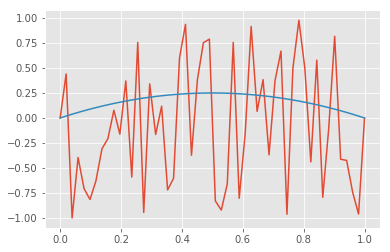

In [13]:
plt.plot(x, u)
plt.plot(x,sol_vec)

In [14]:
def GS(u, f):
    for i in range(1, len(u) - 1):
        u[i] = 0.5*(h*h*f(i*h) + u[i-1] + u[i+1])
    
def Jacobi(u, u_ant, f):
    for i in range(1, len(u) - 1):
        u[i] = 0.5*(h*h*f(i*h) + u_ant[i-1] + u_ant[i+1])    

# Gauss Seidel

In [15]:
erro = 1
iteracoes = 0
while erro > 1e-6:
    GS(u,f)
    erro = np.linalg.norm(u-sol_vec)
    iteracoes += 1

print "Numero de iteracoes = %d\tErro = %e" % (iteracoes, erro)

Numero de iteracoes = 3704	Erro = 9.973120e-07


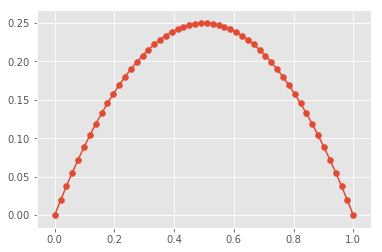

In [16]:
plt.plot(x,u)
plt.scatter(x,sol_vec)

# Jacobi

In [17]:
erro = 1
iteracoes = 0
while erro > 1e-6:
    Jacobi(u,u_ant,f)
    Jacobi(u_ant, u, f)
    erro = np.linalg.norm(u_ant-sol_vec)
    iteracoes += 2

print "Numero de iteracoes = %d\tErro = %e" % (iteracoes, erro)

Numero de iteracoes = 7576	Erro = 9.962600e-07


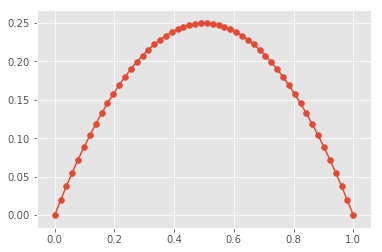

In [18]:
plt.plot(x,u_ant)
plt.scatter(x,sol_vec)

# Multigrid

In [57]:
def R(u):
    ubarra = np.zeros(len(u)/2)
    ubarra[0] = u[0]*0.5 + .25*u[1]
    ubarra[-1] = u[-1]*0.5 + .25*u[-2]
    
    for i in range(1, len(u) - 1):
        ubarra[i] = 0.5*u[i] + .25*(u[i+1] + u[i-1])
    
    return ubarra

In [ ]:
plt.scatter(x,R(u_ant))

# Frequencias da análise

Abrindo o erro na série de fourier

$e^m_j = \sum_{\alpha=0}^{2n-1} c^m_j exp(ij\theta_\alpha)$ com $\theta_\alpha = \frac{\pi\alpha}{n}$ para $\alpha = 0,1,2,...,2n-1$

O período para um $\theta_\alpha$ é

$e^m_j = e^m_{j+T} \Rightarrow exp(ij\theta_\alpha) = exp(i(j + T)\theta_\alpha)$

$T\theta_\alpha = 2\pi \Rightarrow  T = \frac{2\pi}{\theta_\alpha}$

$T = \frac{2n}{\alpha}$

As altas frequências são aquelas com $T\le2 \Rightarrow n \ge 2$ De fato:

In [26]:
n = 4
h = 1.0/(2*n)
x = np.linspace(0.0, 1.0, num=2*n+1, endpoint=True)
x_n = np.linspace(0.0, 1.0, num=100, endpoint=True)

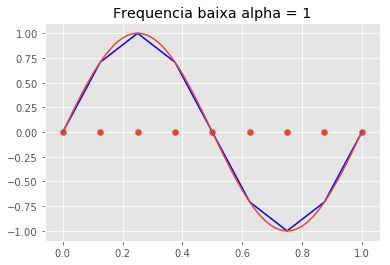

In [29]:
alpha = 1
plt.scatter(x, np.zeros(2*n+1))
plt.plot(x, np.sin(x*np.pi*alpha/(n*h)), c="b")
y = np.sin(x_n*np.pi*alpha/(n*h))
plt.plot(x_n,y)
plt.title("Frequencia baixa alpha = %d" %(alpha))

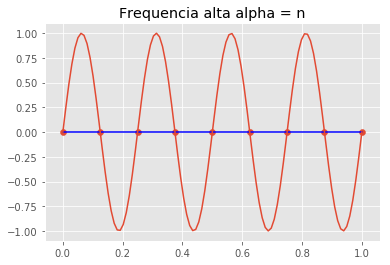

In [33]:
alpha = n
plt.scatter(x, np.zeros(2*n+1))
plt.plot(x, np.sin(x*np.pi*alpha/(n*h)), c="b")
y = np.sin(x_n*np.pi*alpha/(n*h))
plt.plot(x_n,y)
plt.title("Frequencia alta alpha = n")

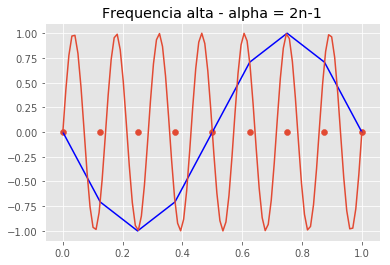

In [32]:
alpha = 2*n-1
plt.scatter(x, np.zeros(2*n+1))
plt.plot(x, np.sin(x*np.pi*alpha/(n*h)), c="b")
y = np.sin(x_n*np.pi*alpha/(n*h))
plt.plot(x_n,y)
plt.title("Frequencia alta - alpha = 2n-1")

## Análise da convergência

$e^m_j = \sum_{\alpha=0}^{2n-1} c^m_j exp(ij\theta_\alpha)$

Iteração de Gauss-Seidel:

$-e^m_{j-1} + 2e^m_j = e^{m-1}_{j+1}$

Depois das contas:

$|g(\theta_\alpha)| = \frac{1}{\sqrt{5 - 4cos(\theta_\alpha)}}$

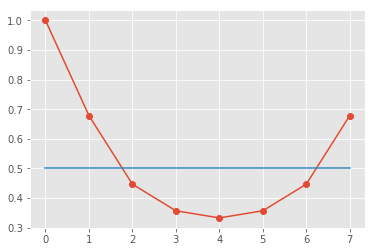

In [56]:
alpha = np.array(range(2*n))
theta = np.pi * alpha / float(n)
plt.plot(alpha, np.power(5.0 - 4.0*np.cos(theta), -0.5), marker="o")
plt.plot([0,2*n-1], [0.5, 0.5])


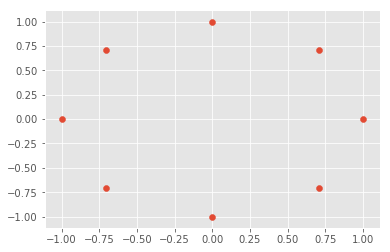

In [53]:
plt.scatter(np.cos(theta), np.sin(theta))


In [39]:
1/(np.array([2.0,2.0,3.0]) - 1)

array([ 1. ,  1. ,  0.5])